# Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.


**Our goal is to build a model to predict the purchase amount of customer against various products which will help the company to create personalized offer for customers against different products**

We got our data from Black Friday Data Hack by Analytics Vidhya (https://datahack.analyticsvidhya.com/contest/black-friday-data-hack/)

Most of the features in the dataset are masked for privacy issues.

# 1 . Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd ..

/Users/Faliha/Dropbox/Faliha Zikra MIS @ SCU/Machine learning/MachineLearning


In [57]:
df= pd.read_csv('data/train.csv')

In [58]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [59]:
df.shape

(550068, 12)

## Data Exploration

### 1.1 Number of customers and Products

In [60]:
# num of unique customers
df.User_ID.nunique()  

5891

In [61]:
#num of unique products
df.Product_ID.nunique()  #num of products

3631

### 1.2 Understanding purchase price

In [62]:
df.Purchase.describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [63]:
df[df['Product_ID']=='P00000142']  

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
293,1000049,P00000142,M,18-25,12,C,4+,1,3,4.0,5.0,13353
1066,1000181,P00000142,M,18-25,17,C,1,0,3,4.0,5.0,5396
1073,1000182,P00000142,M,18-25,4,C,0,0,3,4.0,5.0,13301
1322,1000215,P00000142,M,36-45,14,C,1,1,3,4.0,5.0,10620
1910,1000306,P00000142,M,18-25,0,C,3,0,3,4.0,5.0,8297
2805,1000453,P00000142,M,18-25,4,B,1,0,3,4.0,5.0,8276
3014,1000490,P00000142,M,0-17,10,B,1,0,3,4.0,5.0,10868
3551,1000574,P00000142,M,26-35,19,C,4+,1,3,4.0,5.0,10954
3742,1000613,P00000142,M,36-45,20,C,1,1,3,4.0,5.0,13610
5226,1000855,P00000142,F,18-25,2,A,2,1,3,4.0,5.0,10783


This shows that products don't have a standard selling price. The price fluctuates for every purchase made , similar to house prices. This could be due to the various discounts applied to the product (like buy 2 get 3rd one at 50% off). We checked to see if different citites have different pricing , and we found out that even for the same city the product prices vary. Hence, it would be intereseting to see if the product price has a relationship with the number of items the customer purchased.

Since the prices fluctuate , it would be interesting to see the range of the price of the item (min, mean, max price) to better understand what contributes to this fluctuation.

In [64]:
# creating features with mean of the price of prodcuts customers paid
mean=df.groupby('Product_ID')['Purchase'].mean()
mean=pd.DataFrame(data=mean).reset_index()
df=pd.merge(df,mean, on='Product_ID') # merging the column with the original df
df=df.rename( columns={"Purchase_x": "Purchase_price","Purchase_y": "Mean_Purchase_price"})

In [65]:
# creating features with min  of the price of prodcuts customers paid
minp=df.groupby('Product_ID')['Purchase_price'].min()
minp=pd.DataFrame(data=minp).reset_index()
df=pd.merge(df,minp, on='Product_ID')  
df=df.rename( columns={"Purchase_price_y": "Min_purchase_price", "Purchase_price_x": "Purchase"})

In [66]:
#creating features with max  of the price of prodcuts customers paid
maxp=df.groupby('Product_ID')['Purchase'].max()
maxp=pd.DataFrame(data=maxp).reset_index()
df=pd.merge(df,maxp, on='Product_ID')
df=df.rename( columns={"Purchase_x": "Purchase","Purchase_y": "Max_purchase_price"})

In [67]:
# to see what percent of discount is applied to the items 
df['Discount']=100- ((df.Min_purchase_price /df.Max_purchase_price) *100)

In [68]:
df[df['Discount']==0]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Mean_Purchase_price,Min_purchase_price,Max_purchase_price,Discount
108192,1000046,P00305542,M,18-25,19,C,4+,0,11,NaN,NaN,7478,7478.0,7478,7478,0.0
405774,1000454,P00056542,M,26-35,20,C,2,1,8,13.0,NaN,9790,9790.0,9790,9790,0.0
518496,1001749,P00054442,M,26-35,2,B,1,1,8,NaN,NaN,9941,9941.0,9941,9941,0.0
528854,1002760,P00298842,M,55+,0,C,1,0,2,NaN,NaN,13260,13260.0,13260,13260,0.0
535012,1003705,P00203942,M,46-50,7,B,1,1,5,NaN,NaN,5274,5274.0,5274,5274,0.0
538862,1004751,P00228842,M,51-55,15,C,1,0,8,NaN,NaN,9898,9898.0,9898,9898,0.0
539527,1005111,P00275042,M,36-45,2,B,1,1,8,NaN,NaN,7762,7762.0,7762,7762,0.0
540864,1000087,P00077542,M,26-35,14,C,2,0,8,NaN,NaN,2096,2096.0,2096,2096,0.0
541492,1001069,P00072142,M,26-35,20,A,4+,0,8,NaN,NaN,7947,7947.0,7947,7947,0.0
542389,1001741,P00305442,M,36-45,7,A,4+,1,8,NaN,NaN,7943,7943.0,7943,7943,0.0


In [69]:
df.Discount.describe()

count    550068.000000
mean         79.413392
std           4.329604
min           0.000000
25%          79.954374
50%          80.473838
75%          80.664683
max          80.769231
Name: Discount, dtype: float64

**This shows that customers pay the marked price (Max purchase price) or get a 80 percent discount (min purchase price ) if maybe bought with other items as discussed before** . Hence it would be interesting to see the realtionship between number of items bought and the discounted prices.

### 1.3 Gender of customers

In [70]:
df.Gender.value_counts(normalize=True)

M    0.753105
F    0.246895
Name: Gender, dtype: float64

Most of the cutomers around 75 percent of them are men . This tells us that the store probably sells items that mostly cater to men .

/Users/Faliha/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


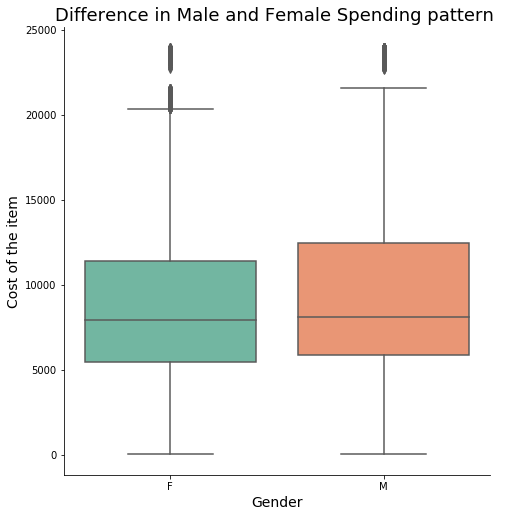

In [71]:
sns.catplot(x="Gender", y="Purchase",kind="box",data=df, palette="Set2", size=7)

plt.title('Difference in Male and Female Spending pattern ', fontsize=18)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Cost of the item', fontsize=14)
plt.show()

Men definitely do buy more expensive items than women. Assuming that this is a men's store, this observation is reasonable.

In [72]:
#propotion of gender who buy expensive items (<75% of purchase price)
df[df['Purchase']>12054]['Gender'].value_counts(normalize=True)

M    0.797067
F    0.202933
Name: Gender, dtype: float64

### 1.4 Occupation of the customers

In [73]:
x=df.Occupation.value_counts(normalize=True)

In [74]:
# grouping occupations that were o less than 2 percent of the occupations
b = x[x >0.02]
b['rest'] = x[x <= 0.02].sum()

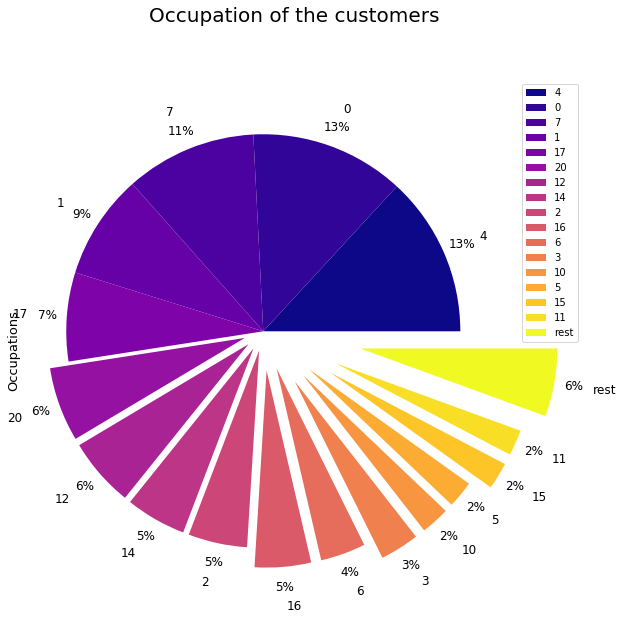

In [75]:

#plot to show different types of occupations
explode = (0,0,0,0,0,0.1, 0.1,0.1,0.1,0.2, 0.2,  0.3,0.3,0.3,0.4,0.4,0.5)
b.plot(kind='pie', fontsize=12, colormap='plasma', explode=explode, figsize=(10,10),
       autopct='%1.0f%%',pctdistance=1.1, labeldistance=1.2)
plt.axis('equal')
plt.suptitle('Occupation of the customers', fontsize=20)
plt.ylabel('Occupations', fontsize=13)
plt.legend(labels=b.index, loc="upper right")
plt.show()

Since this category is masked we don't exactly know what occupations the customers do. Occupations that were less than 2 percent of the population were grouped as 'rest'. But this piechart does give us unformation about our cusotmer behaviour. **We know customers who are from the occupation 4, 0 , 7 and 1 are top customers, this could also relate to their spending patterns.**

It would be interesting to see the spending pattern of the customers that belong to these occupations when compared to the others customers from the other occupations.

### 1.5. City Category 

In [76]:
df.City_Category.value_counts(normalize=True)

B    0.420263
C    0.311189
A    0.268549
Name: City_Category, dtype: float64

**Most of the stores customers live in City B **. It would be interesting to see customers in City B soending patterns vs customers in City A and City C. (See Section 2).

Text(-8.825,0.5,'Cost of the item')

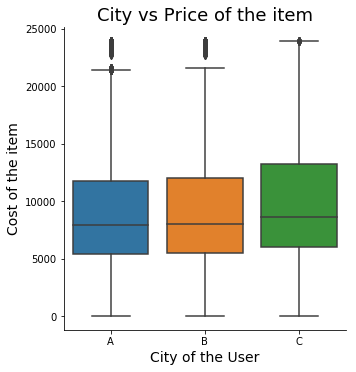

In [77]:
sns.catplot(y='Purchase', x='City_Category', data=df, kind="box")
plt.title('City vs Price of the item', fontsize=18)
plt.xlabel('City of the User', fontsize=14)
plt.ylabel('Cost of the item', fontsize=14)

**However customers in city C seem to buy more expensive items when compared to customers in city A and B** This is could be because City C has a higher standard of living or the customers from city C could be more affluent compared to the other two cities. 

### 1.6 Stay in City years

In [78]:
df.Stay_In_Current_City_Years.value_counts(normalize=True)

1     0.352358
2     0.185137
3     0.173224
4+    0.154028
0     0.135252
Name: Stay_In_Current_City_Years, dtype: float64

Most of the customers of this store have been living in the city for 1 year. Customers who recently moved to the city as well Year 0 seem to be visiting the store, which means the company is marketting it self well. Customers who recently moved to the city are also aware of this store.
It seems like the customers over the years stop visiting the store. The Store can introduce loyalty programs or other marketting and customer retention strategy to keep its customers from finding other alternatives.
The company can take more efforts to increase brand awareness among the customers who recently moved or who have been living in the city for many years.

### 1.7 Marital Status of customers

In [79]:
df.Marital_Status.value_counts(normalize=True)

0    0.590347
1    0.409653
Name: Marital_Status, dtype: float64

60 % of the customers are married. It would be interesting to see how married customers spend in the store vs single customers .(See section 2).

### 1.8. Age of customers

In [80]:
df.Age.value_counts(normalize=True)

26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: Age, dtype: float64

Most of the customer around 40 %  of them belong to the age group of 26-35. **This could mean the items in the store are catered for age groups beterrn 18-45 year old adults.** If not the store can make efforts to target this age group through their ad campaigns and marketting strategies.

Less than 5 percent of the customer base is above the age of 55 or below the age of 17. Which clearly indidcates that the items sold in the store cater to younger people.

It would be interesting to see how the spending pattern among the different age groups.

Text(-8.825,0.5,'Cost of the item')

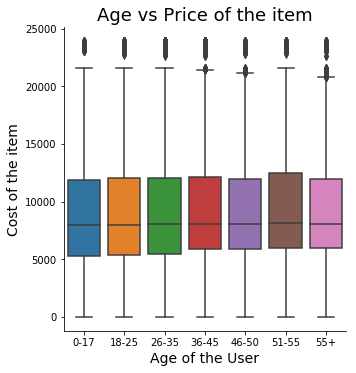

In [81]:
sns.catplot(y='Purchase', x='Age', data=df, kind="box",order=['0-17','18-25','26-35','36-45','46-50','51-55','55+'])

plt.title('Age vs Price of the item', fontsize=18)
plt.xlabel('Age of the User', fontsize=14)
plt.ylabel('Cost of the item', fontsize=14)

This plot doesn't show a huge difference between the spending pattern of the different age groups.

### 1.9. Product Categories

In [83]:
df.Product_Category_1.value_counts(normalize=True)

5     0.274390
1     0.255201
8     0.207111
11    0.044153
2     0.043384
6     0.037206
3     0.036746
4     0.021366
16    0.017867
15    0.011435
13    0.010088
10    0.009317
12    0.007175
7     0.006765
18    0.005681
20    0.004636
19    0.002914
14    0.002769
17    0.001051
9     0.000745
Name: Product_Category_1, dtype: float64

Product categories 5, 1, and 8 seem to be the most common categories that make up around 75 percent of the items in  the store.

It would be interesting to see which categories are the most correlated .

In [84]:
#dummyfying the product categories to see most correlated categories
prdt=pd.get_dummies(df['Product_Category_1'], columns=['Product_Category_1'])

In [85]:
prdt.corr().abs().unstack().sort_values().drop_duplicates().nlargest(10)

1   1     1.000000
5   1     0.359960
    8     0.314288
1   8     0.299169
11  5     0.132165
5   2     0.130956
1   11    0.125807
2   1     0.124657
5   6     0.120885
3   5     0.120107
dtype: float64

**This shows that Category 1 and 5  and 5 and 8 are the most correlated categories and they make up 75 percent of the products.**

### 1.9.  Total amount spent by customer in the store

In [86]:
#amount spent in the store by each user to identify high spenders
amount=df.groupby('User_ID')['Purchase'].sum()
amount=pd.DataFrame(data=amount).reset_index() 
df=pd.merge(df,amount, on ='User_ID')
df=df.rename( columns={"Purchase_y": "Amount_user_spent", "User_ID_x":"User_ID"})

In [87]:
df.Amount_user_spent.describe()

count    5.500680e+05
mean     1.925314e+06
std      1.489901e+06
min      4.668100e+04
25%      7.885630e+05
50%      1.564596e+06
75%      2.669963e+06
max      1.053691e+07
Name: Amount_user_spent, dtype: float64

Customers spent a minimum of 46681 dollars in the store and a maximum of 10536909dollars. Customers who spent more than 2669963dollars are high spenders. It would be in interesting to see the number of items purchased vs amount spend in the store  (See section 2).

In [88]:
#identifying top 10 spenders
df.sort_values('Amount_user_spent', ascending= False).head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase_x,Mean_Purchase_price,Min_purchase_price,Max_purchase_price,Discount,Amount_user_spent
41865,1004277,P00214242,M,36-45,16,A,0,0,1,16.0,NaN,15729,12210.189055,3941,19614,79.907209,10536909
41966,1004277,P00119642,M,36-45,16,A,0,0,1,2.0,8.0,15167,15897.207161,3892,19708,80.251674,10536909
41964,1004277,P00335242,M,36-45,16,A,0,0,5,8.0,NaN,6917,5928.398352,1719,8888,80.659316,10536909
41963,1004277,P00128742,M,36-45,16,A,0,0,1,NaN,NaN,19494,12806.869388,3846,19700,80.477157,10536909
41962,1004277,P00326242,M,36-45,16,A,0,0,2,18.0,NaN,16425,12143.282486,3742,16486,77.301953,10536909
41961,1004277,P00313442,M,36-45,16,A,0,0,5,6.0,8.0,8625,6949.039216,1771,8905,80.112296,10536909
41960,1004277,P00357242,M,36-45,16,A,0,0,5,NaN,NaN,7017,7096.291667,1731,8900,80.550562,10536909
41959,1004277,P00352842,M,36-45,16,A,0,0,2,6.0,15.0,13196,11269.887701,3204,16455,80.528715,10536909
41958,1004277,P00326842,M,36-45,16,A,0,0,5,8.0,NaN,5295,4810.128713,1739,8838,80.323603,10536909
41957,1004277,P00193242,M,36-45,16,A,0,0,6,8.0,NaN,16476,14255.737864,4064,20668,80.336752,10536909


**These are the top ten high spenders of the store. All of them belong to occupation 16 and are single men in the age group of 36-45 who recently moved to the city. Each of them bought 979 items from the store and got 77-81 percent discount on their purchases.**

### 1.11. Spending pattern vs Age and Gender and Marital Status of customer

/Users/Faliha/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


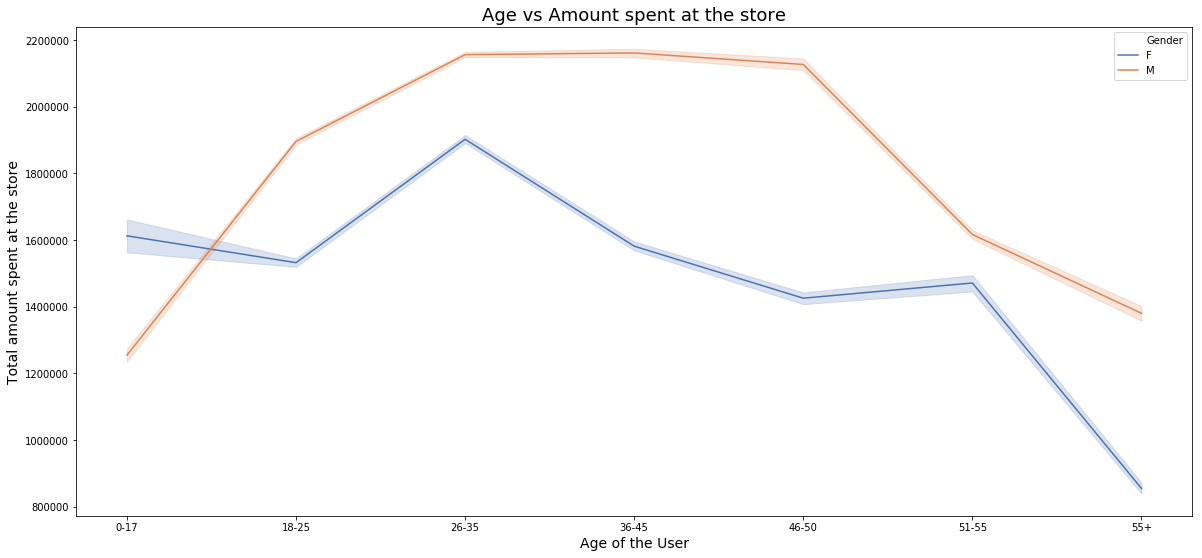

In [34]:

#plot to see how age affects the overall  spending of the user
plt.subplots(figsize=(20,9))
sns.lineplot(x='Age',y='Amount_user_spent',hue='Gender', data=df, palette='deep')

plt.title('Age vs Amount spent at the store', fontsize=18)
plt.xlabel('Age of the User', fontsize=14)
plt.ylabel('Total amount spent at the store', fontsize=14);

**The above plot clearly shows that men and women belonging to the age group 26-35 definitely spend more in the store**. Men between the ages 26-50 spend the most in the store. However, women peak at 26-35 and then there is a gradual decrease in the spending pattern among older female customers.

As discussed earlier, men spend more in the store than women do.

/Users/Faliha/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


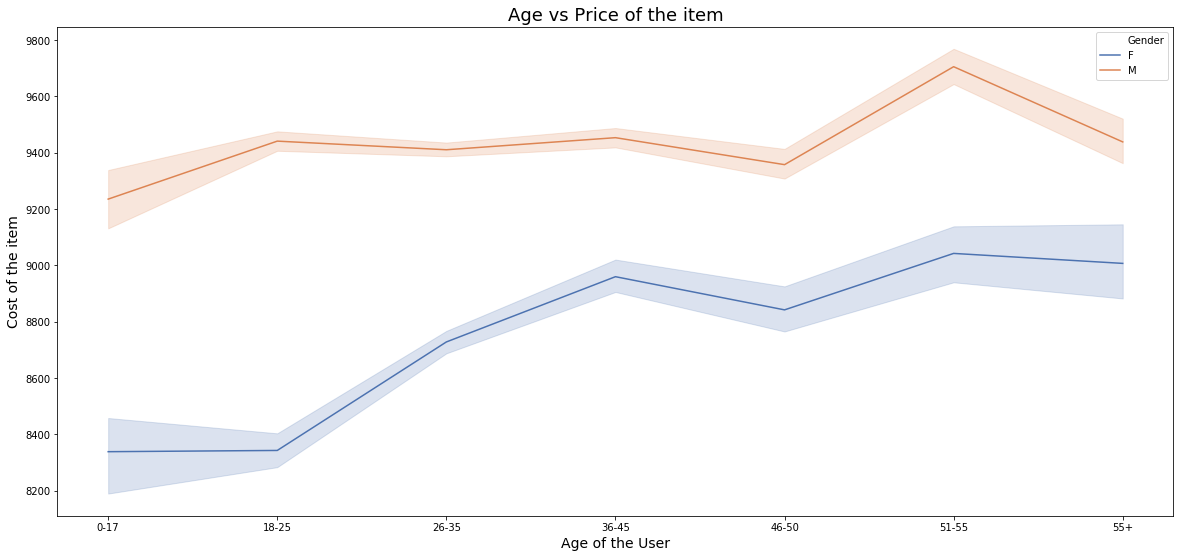

In [89]:

#plot to see how age and gender affects the price of the item they buy
plt.subplots(figsize=(20,9))
sns.lineplot(x='Age',y='Purchase_x',hue='Gender', data=df, palette='deep')

plt.title('Age vs Price of the item', fontsize=18)
plt.xlabel('Age of the User', fontsize=14)
plt.ylabel('Cost of the item', fontsize=14);

**This plot interestingly shows that men on average buy items of the same price around 9300 dollars with sligh spike at age 51-55. However, there is a steady increase in the price of the item women buy as they get older Older women tend to buy more expensive items than younger women.
This however, a contrast to what we saw in the earlier plot, this could mean older women buy few items that are expensive and younger women a lot of items that are cheaper.**

It would also be interesting to see how the quanity of items the users buy changes with the age.(Section 2).

We also looked at how the spending pattern of married vs single customer, and we didn't find anything interesting to puruse in that direction.

## 2. Feature engineering

### 2.1 Number of items a customer bought  

In [90]:
num=df.groupby('User_ID')['Product_ID'].count() #grouping by user id to count number of items each user bought 
numprod=pd.DataFrame(data=num).reset_index()
df=pd.merge(df,numprod, on='User_ID')
df=df.rename( columns={"Product_ID_x":"Product_ID","Product_ID_y": "User_prod_bought"})

In [91]:
df.User_prod_bought.describe(percentiles=(0.25,0.50,.75,0.9,0.95))

count    550068.000000
mean        216.403401
std         175.031150
min           6.000000
25%          82.000000
50%         170.000000
75%         303.000000
90%         467.000000
95%         558.000000
max        1026.000000
Name: User_prod_bought, dtype: float64

**Customers by a minimum of 6 to a maximum of 1026 items. 75 % of the customers buy less than 300 items. As seen in the plot below there are about 5 percent of the customers by more than 600 items.**

Text(0.5,0,'Items bought')

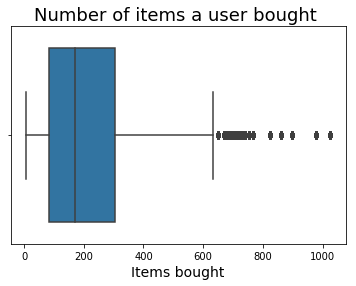

In [92]:
sns.boxplot(x=df["User_prod_bought"])
plt.title('Number of items a user bought ', fontsize=18)
plt.xlabel('Items bought', fontsize=14)


Text(0.5,0,'Amount spent in the store')

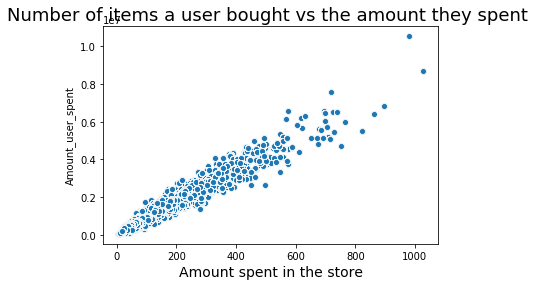

In [93]:
sns.scatterplot(x='User_prod_bought', y='Amount_user_spent', data=df)
plt.title('Number of items a user bought vs the amount they spent ', fontsize=18)
plt.xlabel('Items bought', fontsize=14)
plt.xlabel('Amount spent in the store', fontsize=14)

**As expected the more a user buys the more money they spend.**

/Users/Faliha/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


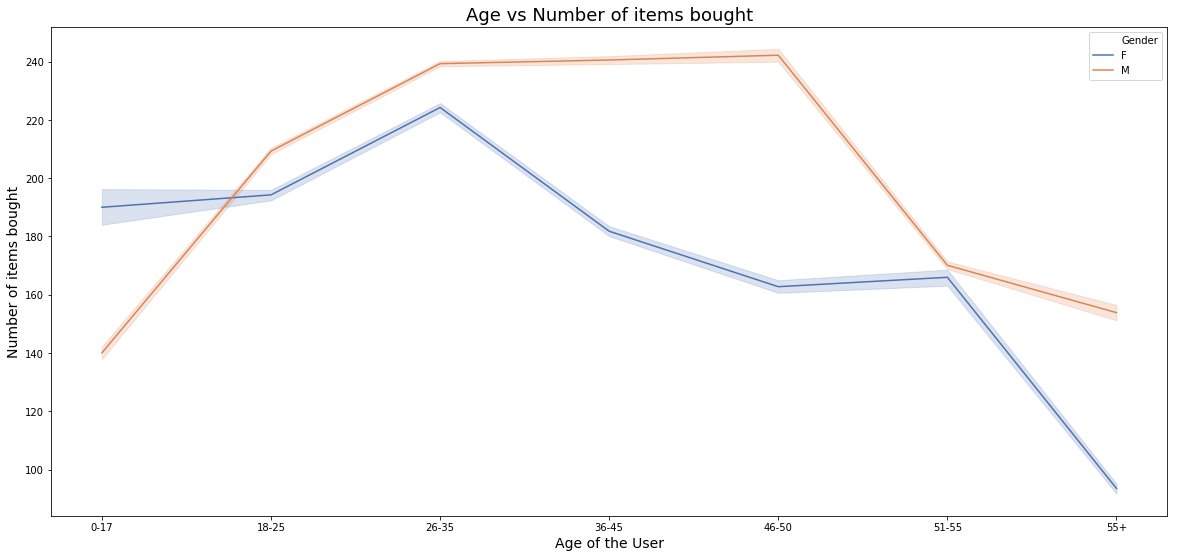

In [94]:

#plot to see how age and gender affects the number of the items they buy
plt.subplots(figsize=(20,9))
sns.lineplot(x='Age',y='User_prod_bought',hue='Gender', data=df, palette='deep')

plt.title('Age vs Number of items bought', fontsize=18)
plt.xlabel('Age of the User', fontsize=14)
plt.ylabel('Number of items bought', fontsize=14);

**As discussed in section 1.10, younger women definitelty buy more items that older women. Men in their prime spending years of 26-50 buy more items that are expensive hence spending more in the store**

### 2.2 . Quantity of an item sold

In [95]:
#number of products of each type that were sold in total
prdtcnt=df.groupby('Product_ID')['User_ID'].count()
prdtcnt=pd.DataFrame(data=prdtcnt).reset_index()
df=pd.merge(df,prdtcnt, on ='Product_ID')
df=df.rename( columns={"User_ID_y": "Quantity_sold"})

In [96]:
df.Quantity_sold.describe()

count    550068.000000
mean        450.477232
std         363.357038
min           1.000000
25%         174.000000
50%         357.000000
75%         620.000000
max        1880.000000
Name: Quantity_sold, dtype: float64

Text(0.5,0,'Quantity')

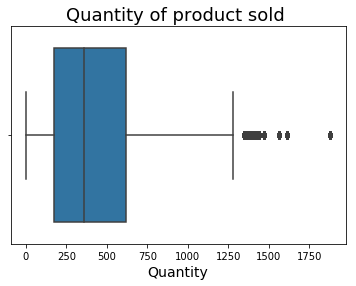

In [97]:
sns.boxplot(x=df["Quantity_sold"])
plt.title('Quantity of product sold ', fontsize=18)
plt.xlabel('Quantity', fontsize=14)

In [98]:
#number of items that were sold only once
df[df['Quantity_sold']==1]['Product_ID'].nunique()

144

More efforts can be made to promote these items or sell them for the discounted price to increase demand for this item.

**We looked to see which items didn't get an 80 % discount, and we found out that these 144 items that were sold only in 1 quantity were not discounted**. This could be for several reasons, either this was the last piece of the item and hence due to high demand for it (first come first serve basis ) no disocunt was given to these items.

**We also found that one customer can buy only one quantity of each product.**

In [99]:
df[df['Discount']==0]['Purchase_x'].min() #min price of low quantity product

405

In [100]:
df[df['Discount']==0]['Purchase_x'].max() #max price of low quantity product

20323

**These items ranged from 405 dollars to 20323 dollars in price** , hence supplemental information is needed to understand why these items weren't discounted and if they were only in 1 quantity because of inventory, demand or other factors. 

In [101]:
#number of popular items
df[df['Quantity_sold']>620]['Product_ID'].nunique()

153

Among these popular items 153 of them are the most popular, more than 620 of these items have been sold out.

In [102]:
#creating a column for popular item 
def popularItem(column):

    if column>620:
        return 1
    else:
        return 0
    
df['Popular']=df['Quantity_sold'].apply(popularItem)

In [103]:
df['discounted']=100- ((df.Purchase_x/ df.Max_purchase_price)*100)

In [104]:
df.discounted.describe()

count    550068.000000
mean         28.951426
std          21.482543
min           0.000000
25%          19.343968
50%          22.149837
75%          40.892024
max          80.769231
Name: discounted, dtype: float64

In [109]:
df[df['discounted']!=0]['Product_ID'].nunique()

3487

### 2.3 Correlated Features

In [51]:
df.corr()

,User_ID_x,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase_x,Mean_Purchase_price,Min_purchase_price,Max_purchase_price,Discount,Amount_user_spent,User_prod_bought,Quantity_sold,Popular,discounted
User_ID_x,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716,0.005361,0.001696,-0.000154,-0.003691,-0.028524,-0.032458,0.003688,0.003901,-0.007925
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833,0.020582,0.019200,0.019811,-0.001203,0.003933,-0.002929,0.011679,0.009822,-0.006282
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463,0.003620,0.005165,-0.007394,-0.026643,-0.003875,0.000678,-0.010415,-0.006329,-0.010327
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703,-0.404519,-0.369515,-0.470533,-0.116616,0.003524,0.017748,-0.205178,-0.113890,-0.027950
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918,-0.251257,-0.256232,-0.298090,-0.079548,0.007833,0.012964,-0.133886,-0.069055,-0.035374
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006,-0.028508,-0.030168,-0.035791,-0.021687,0.011517,0.007005,-0.059916,-0.062258,-0.000993
Purchase_x,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,0.849659,0.735215,0.797802,0.007706,-0.038439,-0.090356,0.308641,0.218313,-0.563639
Mean_Purchase_price,0.005361,0.020582,0.003620,-0.404519,-0.251257,-0.028508,0.849659,1.000000,0.865306,0.938967,0.009070,-0.051050,-0.077365,0.363253,0.256942,-0.162747
Min_purchase_price,0.001696,0.019200,0.005165,-0.369515,-0.256232,-0.030168,0.735215,0.865306,1.000000,0.897435,-0.343566,0.013478,-0.009264,0.099639,0.056468,-0.042298
Max_purchase_price,-0.000154,0.019811,-0.007394,-0.470533,-0.298090,-0.035791,0.797802,0.938967,0.897435,1.000000,0.053430,-0.003968,-0.030514,0.205856,0.123439,-0.015644


**Quantity sold seems to be a feature correlated with Purchase price**

We also decided to drop Product category 2 and 3.

In [52]:
#dropping columns that contain purchase information for modeling
df.drop(['Product_Category_3','Product_Category_2', 'Mean_Purchase_price', 'Min_purchase_price', 'Max_purchase_price',
         'Amount_user_spent','Discount'], axis=1, inplace=True)

In [53]:
df.to_csv('data/newdf.csv')